## Find distinguishing properties of modalities

In [6]:
import six

In [3]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline



import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'


study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-02-25 09:55:53	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-02-25 09:55:53	Parsing datapackage to create a Study object
2016-02-25 09:56:45	Initializing Study
2016-02-25 09:56:45	Initializing Predictor configuration manager for Study
2016-02-25 09:56:45	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-25 09:56:45	Added ExtraTreesClassifier to default predictors
2016-02-25 09:56:45	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-25 09:56:45	Added ExtraTreesRegressor to default predictors
2016-02-25 09:56:45	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-25 09:56:45	Added GradientBoostingClassifier to default predictors
2016-02-25 09:56:45	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2016-02-25 09:56:45	Added GradientBoostingRegressor to default predictors
2016-02-25 09:56:50	Build

In [21]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'
figure_folder = '{}/nucleotide_content'.format(folder)
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/nucleotide_content': File exists


In [5]:
csv_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper'

splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

In [26]:
nucleotides = 'ACGT'
contexts = 'upstream', 'downstream'
exon_types = 'alternative', 'constitutive'

alternative_dfs = []
constitutive_dfs = []

for context in contexts:
    for exon_type in exon_types:
        for nucleotide in nucleotides:
            six.print_(exon_type, context, nucleotide)
            csv = '{}/{}/nucleotide_content/{}400_nucleotide_content_{}.csv'.format(splicing_feature_folder, 
                                                                                    exon_type, context, nucleotide)
            df = pd.read_csv(csv, index_col=0)
            df = df * 100
            six.print_('\t', df.shape)
            tidy = df.unstack().reset_index()
            tidy = tidy.rename(
                columns={'level_0': 'window_relative_to_exon', 'level_1': 'event_id', 0:'Nucleotide Percentage'})
            tidy['window_relative_to_exon'] = tidy['window_relative_to_exon'].astype(int)
    #             if context == 'upstream':
    #                 tidy['window_relative_to_genome'] = np.abs(tidy['window_relative_to_exon'] - 39)
    #             else:
    #                 tidy['window_relative_to_genome'] = tidy['window_relative_to_exon'].copy()
            tidy['Region'] = context.title()
            tidy['exon_type'] = exon_type
            tidy['Nucleotide'] = nucleotide
            if exon_type == 'alternative':
                alternative_dfs.append(tidy)
            else:
                constitutive_dfs.append(tidy)
alternative_df = pd.concat(alternative_dfs)
constitutive_df = pd.concat(constitutive_dfs)

print(alternative_df.shape)
alternative_df.head()

alternative upstream A
	 (43903, 40)
alternative upstream C
	 (43903, 40)
alternative upstream G
	 (43903, 40)
alternative upstream T
	 (43903, 40)
constitutive upstream A
	 (5893, 40)
constitutive upstream C
	 (5893, 40)
constitutive upstream G
	 (5893, 40)
constitutive upstream T
	 (5893, 40)
alternative downstream A
	 (43903, 40)
alternative downstream C
	 (43903, 40)
alternative downstream G
	 (43903, 40)
alternative downstream T
	 (43903, 40)
constitutive downstream A
	 (5893, 40)
constitutive downstream C
	 (5893, 40)
constitutive downstream G
	 (5893, 40)
constitutive downstream T
	 (5893, 40)
(14048960, 6)


,window_relative_to_exon,event_id,Nucleotide Percentage,Region,exon_type,Nucleotide
0,0,exon:chr10:102003455-102003534:-@exon:chr10:10...,10,Upstream,alternative,A
1,0,exon:chr10:102013178-102013296:-@exon:chr10:10...,20,Upstream,alternative,A
2,0,exon:chr10:102020723-102020801:-@exon:chr10:10...,20,Upstream,alternative,A
3,0,exon:chr10:102021736-102021820:-@exon:chr10:10...,20,Upstream,alternative,A
4,0,exon:chr10:102021736-102021820:-@exon:chr10:10...,10,Upstream,alternative,A


In [27]:
alternative_modalities = study.supplemental.modalities_tidy.merge(alternative_df, 
                                                      left_on='event_id', right_on='event_id')
alternative_modalities.head()

,phenotype,event_id,modality,window_relative_to_exon,Nucleotide Percentage,Region,exon_type,Nucleotide
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,0,30,Upstream,alternative,A
1,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,1,0,Upstream,alternative,A
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,2,10,Upstream,alternative,A
3,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,3,10,Upstream,alternative,A
4,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,4,20,Upstream,alternative,A


In [28]:
constitutive_df.shape

(1885760, 6)

In [29]:
constitutive_df['modality'] = 'constitutive'

constitutive_phenotypes = []

for phenotype in study.phenotype_order:
    constitutive_df['phenotype'] = phenotype
    constitutive_phenotypes.append(constitutive_df.copy())
constitutive_phenotype = pd.concat(constitutive_phenotypes)
constitutive_phenotype.head()

,window_relative_to_exon,event_id,Nucleotide Percentage,Region,exon_type,Nucleotide,modality,phenotype
0,0,exon:chr10:102039881-102039985:-,30,Upstream,constitutive,A,constitutive,iPSC
1,0,exon:chr10:102040691-102040810:-,40,Upstream,constitutive,A,constitutive,iPSC
2,0,exon:chr10:102045854-102045970:-,10,Upstream,constitutive,A,constitutive,iPSC
3,0,exon:chr10:102286732-102286831:-,10,Upstream,constitutive,A,constitutive,iPSC
4,0,exon:chr10:102289123-102289263:-,10,Upstream,constitutive,A,constitutive,iPSC


In [30]:
constitutive_phenotype.shape

(5657280, 8)

In [31]:
nucleotide_content_all = pd.concat([constitutive_phenotype, alternative_modalities])
nucleotide_content_all.head()

,Nucleotide,Nucleotide Percentage,Region,event_id,exon_type,modality,phenotype,window_relative_to_exon
0,A,30,Upstream,exon:chr10:102039881-102039985:-,constitutive,constitutive,iPSC,0
1,A,40,Upstream,exon:chr10:102040691-102040810:-,constitutive,constitutive,iPSC,0
2,A,10,Upstream,exon:chr10:102045854-102045970:-,constitutive,constitutive,iPSC,0
3,A,10,Upstream,exon:chr10:102286732-102286831:-,constitutive,constitutive,iPSC,0
4,A,10,Upstream,exon:chr10:102289123-102289263:-,constitutive,constitutive,iPSC,0


In [32]:
nucleotide_content_all.groupby(['exon_type', 'modality', 'Region', 'phenotype']).size()

exon_type     modality      Region      phenotype
alternative   ambivalent    Downstream  MN              160
                                        NPC             480
                                        iPSC           4960
                            Upstream    MN              160
                                        NPC             480
                                        iPSC           4960
              bimodal       Downstream  MN            56960
                                        NPC          120160
                                        iPSC         215680
                            Upstream    MN            56960
                                        NPC          120160
                                        iPSC         215680
              concurrent    Downstream  iPSC            160
                            Upstream    iPSC            160
              excluded      Downstream  MN            86560
                                        NPC       

In [33]:
MODALITY_TO_COLOR['constitutive'] = 'k'

In [34]:
nucleotide_content_all.head()

,Nucleotide,Nucleotide Percentage,Region,event_id,exon_type,modality,phenotype,window_relative_to_exon
0,A,30,Upstream,exon:chr10:102039881-102039985:-,constitutive,constitutive,iPSC,0
1,A,40,Upstream,exon:chr10:102040691-102040810:-,constitutive,constitutive,iPSC,0
2,A,10,Upstream,exon:chr10:102045854-102045970:-,constitutive,constitutive,iPSC,0
3,A,10,Upstream,exon:chr10:102286732-102286831:-,constitutive,constitutive,iPSC,0
4,A,10,Upstream,exon:chr10:102289123-102289263:-,constitutive,constitutive,iPSC,0


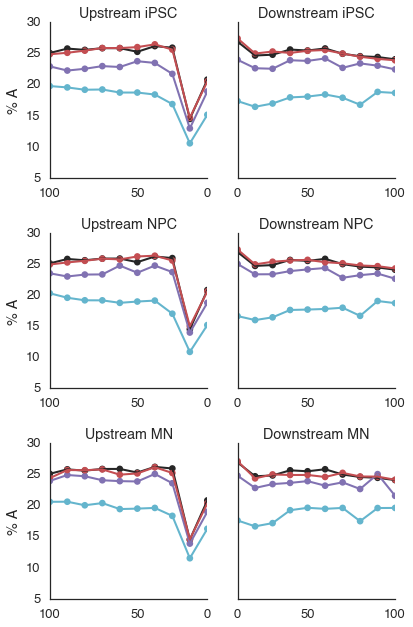

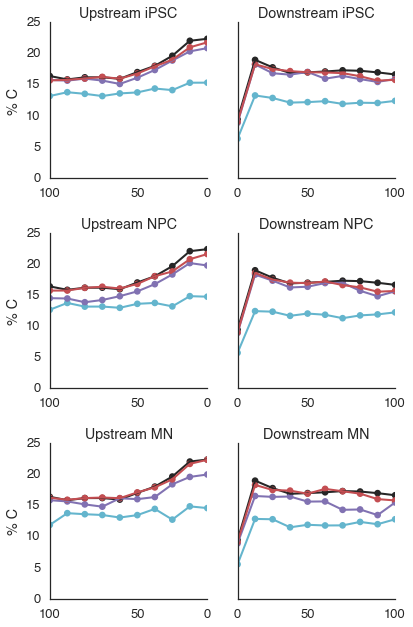

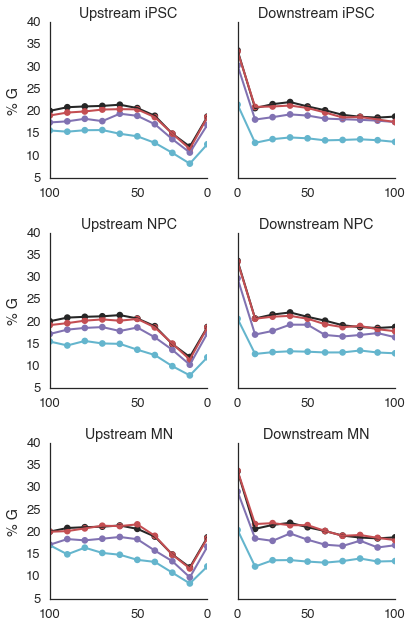

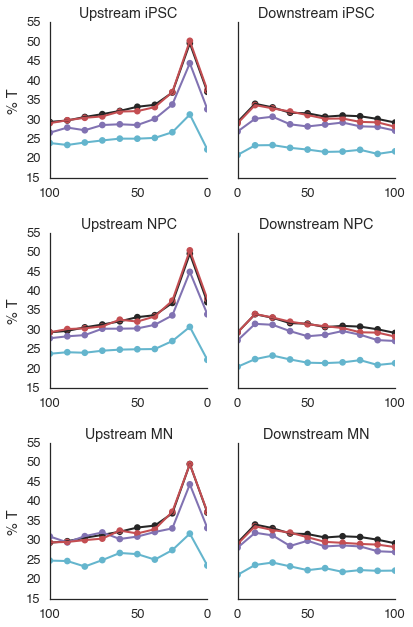

In [42]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

modality_to_color = MODALITY_TO_COLOR.copy()
modality_to_color['constitutive'] = '#262626'

modality_order = ['constitutive', 'excluded', 'bimodal', 'included']
modality_palette = [modality_to_color[x] for x in modality_order]

for nucleotide, nucleotide_df in nucleotide_content_all.groupby('Nucleotide'):

    g = sns.FacetGrid(nucleotide_df, hue='modality', row='phenotype', col='Region', 
                      palette=modality_palette, hue_order=modality_order, row_order=study.phenotype_order,
                     col_order=['Upstream', 'Downstream'], sharex=False)

    g.map(sns.pointplot, 'window_relative_to_exon', 'Nucleotide Percentage', scale=0.5, dodge=True, ci=None)
    g.set_titles('{col_name} {row_name}')
    g.set_ylabels('% {}'.format(nucleotide))
    for ax in g.axes.flat:
        if ax.is_first_col():
            ax.invert_xaxis()
    g.set(xlabel='')
    g.set(xticks=[0, 19, 39], xticklabels=[0, 200, 400])
    g.fig.tight_layout()
    g.savefig('{}/intron_window_nucleotide_content_{}.pdf'.format(figure_folder, nucleotide))

    # Zoom in on first 100nt
    g.set(xlim=(0, 9), xticks=[0, 4, 9], xticklabels=[0, 50, 100])
    for ax in g.axes.flat:
        if ax.is_first_col():
            ax.invert_xaxis()
    g.savefig('{}/intron_window_nucleotide_content_{}_zoom100nt.pdf'.format(figure_folder, nucleotide))


### Statistical testing: Kruskal-wallis

In [55]:
from scipy.stats.mstats import kruskalwallis
lines = []

col = 'Nucleotide Percentage'

for nucleotide, nucleotide_df in nucleotide_content_all.groupby('Nucleotide'):
    for phenotype, phenotype_df in nucleotide_df.groupby(['phenotype']):
    #     six.print_(phenotype)
        grouped = phenotype_df.groupby('modality')
        constitutive = grouped.get_group('constitutive')

        for modality, modality_df in grouped:
            if modality == 'constitutive':
                continue
    #         six.print_('\t', modality)

            result = kruskalwallis(modality_df[col], constitutive[col])
    #         six.print_('\t\t', result)
            lines.append([phenotype, nucleotide, modality, result[0], result[1]])
nucleotide_significance = pd.DataFrame(lines, columns=['phenotype', 'nucleotide', 'modality', 'statstic', 'p-value'])
nucleotide_significance['q-value'] = nucleotide_significance['p-value'] * nucleotide_significance.shape[0]
nucleotide_significance = nucleotide_significance.set_index(['phenotype', 'nucleotide', 'modality']).sort_index()
nucleotide_significance.loc[nucleotide_significance['q-value'] < 1e-3]

statstic        p-value        q-value
phenotype nucleotide modality                                             
MN        A          bimodal      118.137765   1.617538e-27   8.411199e-26
                     excluded    1259.459571  7.300167e-276  3.796087e-274
                     included     445.427043   7.133929e-99   3.709643e-97
          C          ambivalent    32.295737   1.324035e-08   6.884983e-07
                     bimodal      320.158624   1.337672e-71   6.955893e-70
                     excluded    1336.088539  1.624644e-292  8.448147e-291
                     included     286.622836   2.706602e-64   1.407433e-62
          G          ambivalent    30.719771   2.981120e-08   1.550183e-06
                     bimodal      504.443596  1.025987e-111  5.335134e-110
                     excluded    1845.100662   0.000000e+00   0.000000e+00
                     included     186.667552   1.697327e-42   8.826102e-41
          T          bimodal      120.716684   4.407939e-28   2.292128e-26
                     excluded    1485.183240   0.000000e+00   0.000000e+00
                     included     407.417497   1.337443e-90   6.954706e-89
NPC       A          bimodal      321.128338   8.224816e-72   4.276904e-70
                     excluded    3431.411840   0.000000e+00   0.000000e+00
                     included     730.304442  7.691319e-161  3.999486e-159
          C          bimodal      538.915656  3.245859e-119  1.687847e-117
                     excluded    3056.306157   0.000000e+00   0.000000e+00
                     included    1162.823957  7.324810e-255  3.808901e-253
          G          bimodal     1053.429057  4.375350e-231  2.275182e-229
                     excluded    4313.376519   0.000000e+00   0.000000e+00
                     included    1137.581630  2.243135e-249  1.166430e-247
          T          bimodal      316.946834   6.698180e-71   3.483053e-69
                     excluded    3610.234027   0.000000e+00   0.000000e+00
                     included     760.109025  2.543051e-167  1.322386e-165
iPSC      A          bimodal      756.790234  1.339581e-166  6.965824e-165
                     excluded    4852.433644   0.000000e+00   0.000000e+00
                     included    1444.203065   0.000000e+00   0.000000e+00
          C          bimodal      323.162153   2.965694e-72   1.542161e-70
                     excluded    3659.478792   0.000000e+00   0.000000e+00
                     included    1860.858126   0.000000e+00   0.000000e+00
          G          ambivalent    26.132951   3.186987e-07   1.657233e-05
                     bimodal      959.850017  9.585267e-211  4.984339e-209
                     excluded    5196.359246   0.000000e+00   0.000000e+00
                     included    2056.336543   0.000000e+00   0.000000e+00
          T          bimodal      551.490653  5.966414e-122  3.102535e-120
                     excluded    5090.489556   0.000000e+00   0.000000e+00
                     included    1467.525335   0.000000e+00   0.000000e+00

## Pyrimidine content: C + T

In [43]:
nucleotide_content_all.head()

,Nucleotide,Nucleotide Percentage,Region,event_id,exon_type,modality,phenotype,window_relative_to_exon
0,A,30,Upstream,exon:chr10:102039881-102039985:-,constitutive,constitutive,iPSC,0
1,A,40,Upstream,exon:chr10:102040691-102040810:-,constitutive,constitutive,iPSC,0
2,A,10,Upstream,exon:chr10:102045854-102045970:-,constitutive,constitutive,iPSC,0
3,A,10,Upstream,exon:chr10:102286732-102286831:-,constitutive,constitutive,iPSC,0
4,A,10,Upstream,exon:chr10:102289123-102289263:-,constitutive,constitutive,iPSC,0


In [44]:
index_cols = ['Region', 'modality', 'phenotype', 'window_relative_to_exon']

In [45]:
value_col = 'Nucleotide Percentage'

In [46]:
grouped = nucleotide_content_all.groupby('Nucleotide')
c = grouped.get_group('C').set_index(index_cols)
t = grouped.get_group('T').set_index(index_cols)

pyrimidine_content = c[value_col] + t[value_col]
pyrimidine_content = pyrimidine_content.reset_index()
pyrimidine_content.head()

,Region,modality,phenotype,window_relative_to_exon,Nucleotide Percentage
0,Upstream,constitutive,iPSC,0,50
1,Upstream,constitutive,iPSC,0,50
2,Upstream,constitutive,iPSC,0,60
3,Upstream,constitutive,iPSC,0,70
4,Upstream,constitutive,iPSC,0,60


In [47]:
pyrimidine_content = pyrimidine_content.rename(columns={"Nucleotide Percentage": 'Pyrimidine Percentage'})
pyrimidine_content.head()

,Region,modality,phenotype,window_relative_to_exon,Pyrimidine Percentage
0,Upstream,constitutive,iPSC,0,50
1,Upstream,constitutive,iPSC,0,50
2,Upstream,constitutive,iPSC,0,60
3,Upstream,constitutive,iPSC,0,70
4,Upstream,constitutive,iPSC,0,60


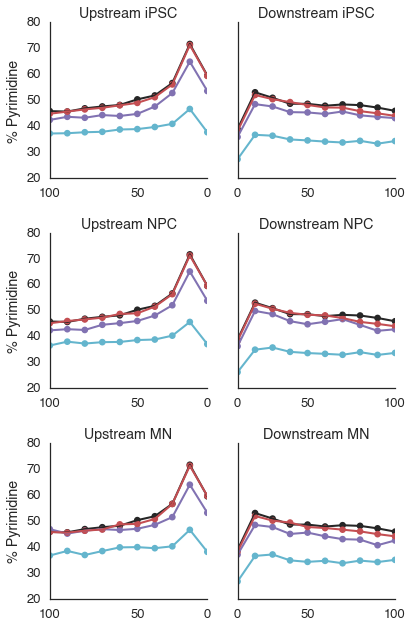

In [50]:
g = sns.FacetGrid(pyrimidine_content, hue='modality', row='phenotype', col='Region', 
                  palette=modality_palette, hue_order=modality_order, row_order=study.phenotype_order,
                 col_order=['Upstream', 'Downstream'], sharex=False)

g.map(sns.pointplot, 'window_relative_to_exon', 'Pyrimidine Percentage', scale=0.5, dodge=True, ci=None)
g.set_titles('{col_name} {row_name}')
g.set_ylabels('% Pyrimidine')
for ax in g.axes.flat:
    if ax.is_first_col():
        ax.invert_xaxis()
g.set(xlabel='')
g.set(xticks=[0, 19, 39], xticklabels=[0, 200, 400])
g.fig.tight_layout()
g.savefig('{}/intron_window_pyrimidine_content_{}.pdf'.format(figure_folder, nucleotide))

# Zoom in on first 100nt
g.set(xlim=(0, 9), xticks=[0, 4, 9], xticklabels=[0, 50, 100])
for ax in g.axes.flat:
    if ax.is_first_col():
        ax.invert_xaxis()
g.savefig('{}/intron_window_pyrimidine_content_{}_zoom100nt.pdf'.format(figure_folder, nucleotide))

## Conserved nucleotide content

Overlap with UCSC PhastCons Elements Placental 46way

In [51]:
nucleotides = 'ACGT'
contexts = 'upstream', 'downstream'
exon_types = 'alternative', 'constitutive'

alternative_dfs = []
constitutive_dfs = []

for context in contexts:
    for exon_type in exon_types:
        for nucleotide in nucleotides:
            six.print_(exon_type, context, nucleotide)
            csv = '{}/{}/nucleotide_content/{}400_nucleotide_content_{}_placental_mammal.csv'.format(splicing_feature_folder, 
                                                                                    exon_type, context, nucleotide)
            df = pd.read_csv(csv, index_col=0)
            df = df * 100
            six.print_('\t', df.shape)
            tidy = df.unstack().reset_index()
            tidy = tidy.rename(
                columns={'level_0': 'window_relative_to_exon', 'level_1': 'event_id', 0:'Nucleotide Percentage'})
            tidy['window_relative_to_exon'] = tidy['window_relative_to_exon'].astype(int)
    #             if context == 'upstream':
    #                 tidy['window_relative_to_genome'] = np.abs(tidy['window_relative_to_exon'] - 39)
    #             else:
    #                 tidy['window_relative_to_genome'] = tidy['window_relative_to_exon'].copy()
            tidy['Region'] = context.title()
            tidy['exon_type'] = exon_type
            tidy['Nucleotide'] = nucleotide
            if exon_type == 'alternative':
                alternative_dfs.append(tidy)
            else:
                constitutive_dfs.append(tidy)
alternative_df = pd.concat(alternative_dfs)
constitutive_df = pd.concat(constitutive_dfs)

print(alternative_df.shape)
alternative_df.head()

alternative upstream A


IOError: File /projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/splicing_feature_data/alternative/nucleotide_content/upstream400_nucleotide_content_A_placental_mammal.csv does not exist